In [7]:
# pyscience imports
import os
import sys
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
# plt.style.use("dark_background")
sns.set(style="ticks", context="talk")
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
%pwd
years = list(range(1970, 1999, 1))
colorder = ['year', 'club', 'played', 'home_w', 'home_d', 'home_l', 'home_f', 'home_a', 
'away_w', 'away_d', 'away_l', 'away_f', 'away_a', 'pts' , 'n_teams']
epl_renames = {
    'Team': 'club',
    'Played': 'played',
    'Pts': 'pts'
}

'/home/alal/Dropbox/1_Research/league-tables-scraper'

In [9]:
english_league = []
scottish_league = []
for s in years:
    # english league
    try:
        r = pd.read_csv('english_league_tables/english_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r.rename(columns = epl_renames, inplace=True)
        r = r[colorder]
        english_league.append(r)
    except:
        print('English League ' + str(s) + ' league table not found')
    # scottish league
    try:
        r = pd.read_csv('scottish_league_tables/scottish_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r = r[colorder]
        scottish_league.append(r)
    except:
        print('Scottish League ' + str(s) + ' league table not found')

In [10]:
spl_series = pd.concat(scottish_league)
spl_series = spl_series[[c for c in spl_series.columns if not c.startswith('Unnamed')]]
spl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams
0,1970,Celtic,34.0,12,2,3.0,54.0,18.0,15.0,1.0,1.0,42.0,15.0,57.0,18
1,1970,Rangers,34.0,13,1,3.0,38.0,17.0,6.0,6.0,5.0,29.0,23.0,45.0,18
2,1970,Hibernian,34.0,12,3,2.0,40.0,17.0,7.0,3.0,7.0,25.0,23.0,44.0,18
3,1970,Hearts,34.0,6,7,4.0,28.0,19.0,7.0,5.0,5.0,22.0,17.0,38.0,18
4,1970,Dundee United,34.0,10,3,4.0,36.0,23.0,6.0,3.0,8.0,26.0,41.0,38.0,18


In [11]:
epl_series = pd.concat(english_league)
epl_series = epl_series[[c for c in epl_series.columns if not c.startswith('Unnamed')]]
epl_series['year'] = 1900 + epl_series.year
epl_series.year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998])

In [12]:
spl_series['goals'] = spl_series.home_f + spl_series.away_f
epl_series['goals'] = epl_series.home_f + epl_series.away_f
spl_series['goals_perteam'] = spl_series.goals / spl_series.n_teams
epl_series['goals_perteam'] = epl_series.goals / epl_series.n_teams

In [13]:
scotlandgoals = spl_series[['year','goals_perteam']].groupby('year').sum()
englandgoals = epl_series[['year','goals_perteam']].groupby('year').sum()

In [14]:
ts = pd.concat([scotlandgoals, englandgoals], axis=1)
ts.columns = ['scotland_goals_per_team', 'england_goals_per_team']
ts.reset_index(inplace=True)
ts

,year,scotland_goals_per_team,england_goals_per_team
0,1970,52.444444,55.090909
1,1971,49.388889,49.500000
2,1972,52.833333,52.727273
3,1973,51.777778,52.727273
4,1974,48.444444,50.318182
5,1975,52.777778,55.136364
6,1976,50.100000,50.272727
7,1977,50.700000,53.772727
8,1978,50.800000,55.954545
9,1979,48.300000,55.318182


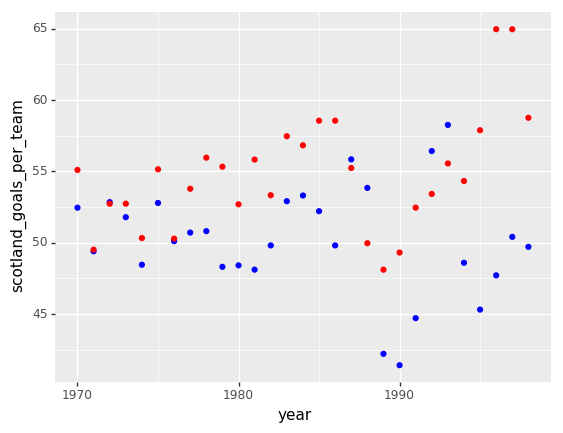

<ggplot: (8784427565853)>

In [15]:
ggplot(ts, aes(x='year')) +\
    geom_point(aes(y='scotland_goals_per_team'), colour='Blue') +\
    geom_point(aes(y='england_goals_per_team'), colour='Red') 